# Doc-id reassignment

## 1. Data downloading 

In [1]:
from model.rcv1 import RCV1Downloader

downloader = RCV1Downloader()
downloader

RCV1Downloader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz; Downloaded: True]

In [2]:
downloader.download()

INFO: Dataset is already downloaded at /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz


## 2. Data configuration 

In [3]:
from model.rcv1 import DataConfig

config = DataConfig(name="rcv1-170", n_cluster=170)
config

rcv1-170 [Docs: all; Terms: all; N-Clusters: 170]

## 3. Data loading 

In [4]:
from model.rcv1 import RCV1Loader

loader = RCV1Loader()
loader

RCV1Loader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz]

In [5]:
collection = loader.load()
collection

DataCollection [Docs: 804414; Terms: 47219; Nonzero: 60915113]

## 4. Original *d*-gap 

In [6]:
from model.d_gap import DGapComputation

d_gap_original = DGapComputation(collection=collection, data_name=config.name)
d_gap_original

DGapComputation(rcv1-170)[Docs: 804414; Terms: 47219; Computed: False]

In [7]:
d_gap_original.compute_d_gaps()

INFO: Retrieving average d-gaps from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170/avg_d_gap.json. 


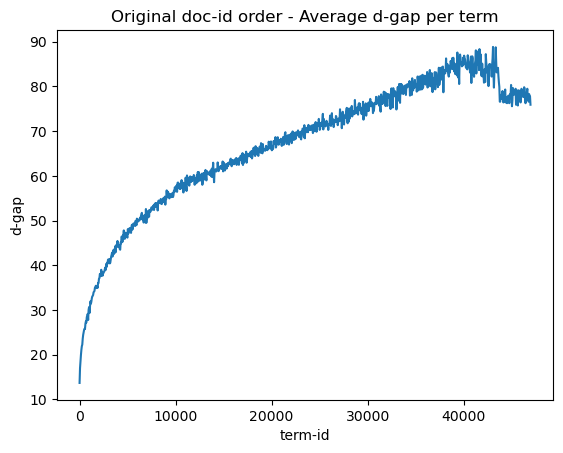

In [8]:
d_gap_original.plot_avg_d_gap()

In [9]:
d_gap_original.avg_d_gap

67.08168322073742

## 5. Clustering 

In [10]:
from model.clustering import KMeansClustering

kmeans = KMeansClustering(collection=collection, data_name=config.name, k=config.n_cluster)
kmeans

KMeansClustering(rcv1-170)[Items: 804414; k: 170; Labeling computed: False]

In [11]:
kmeans.fit()

INFO: Retrieving labeling from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170/labeling.json. 


In [12]:
collection_clusters = kmeans.clusters
collection_clusters

RCV1Clusters(rcv1-170)[Data: 804414, Clusters: 170, Mean-per-Cluster: 4731.847; centroids computed: False]

## 6. Reassignment

In [13]:
from model.reassignment import DocIdReassignment

reassignment = DocIdReassignment(cluster=collection_clusters, data_name=config.name)
reassignment

INFO: Retrieving centroids from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170/centroids.npy. 


DocIdReassignment(rcv1-170)[Items: 804414]

In [14]:
reassignment.solve()

INFO: Retrieving order from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170/reassignment_order.json. 


In [15]:
collection_reassigned = reassignment.reassign_doc_id()
collection_reassigned

DataCollection [Docs: 804414; Terms: 47219; Nonzero: 60915113]

## 7. Reassigned *d*-gap

In [16]:
from model.d_gap import DGapComputationReassigned

d_gap_reassigned = DGapComputationReassigned(collection=collection_reassigned, data_name=config.name)
d_gap_reassigned

DGapComputation(rcv1-170)[Docs: 804414; Terms: 47219; Computed: False]

In [17]:
d_gap_reassigned.compute_d_gaps()

INFO: Retrieving average d-gaps from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170/avg_d_gap_reassigned.json. 


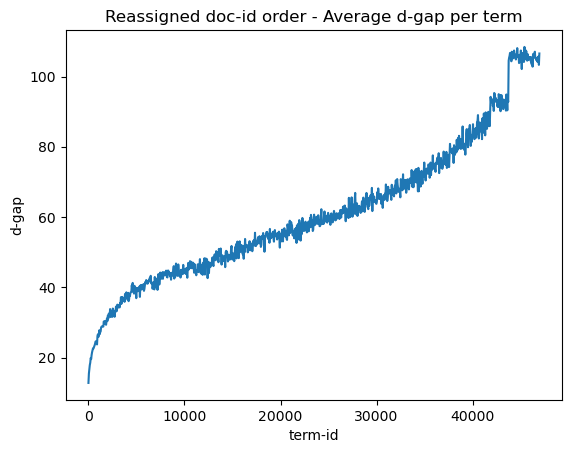

In [18]:
d_gap_reassigned.plot_avg_d_gap()

In [19]:
d_gap_reassigned.avg_d_gap

61.39909782079248

## 8. Inference

In [20]:
from model.d_gap import DGapInference

inference = DGapInference(d_gap_original=d_gap_original, d_gap_reassigned=d_gap_reassigned, data_name=config.name)
inference

INFO: Average d-gaps already computed. Use `gaps_stats` to retrieve them. 
INFO: Average d-gaps already computed. Use `gaps_stats` to retrieve them. 


DGapInference[Terms: 47219]

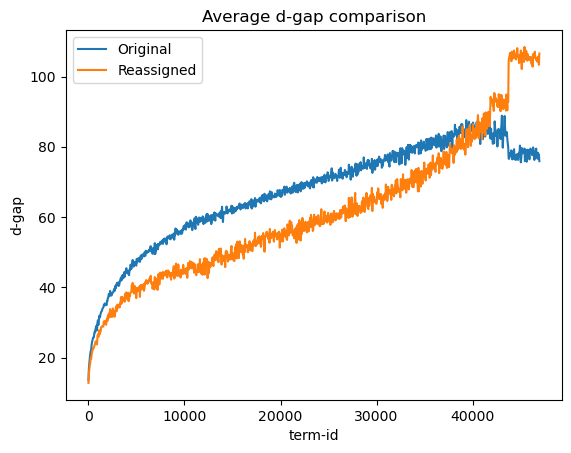

In [21]:
inference.plot_avg_d_gap()

In [22]:
inference.avg_compression

9.20733197603759

## 9. Two-Step reassignment

In [23]:
from model.reassignment import TwoStepReassignment

config_2step = DataConfig(name="rcv1-170-v2", n_cluster=170)
k2 = 100

two_step = TwoStepReassignment(config=config_2step, k2=k2)
two_step

TwoStepReassignment[2-step-k: 100]

In [24]:
two_step.reassign()

INFO:  - Computing d-gap...
INFO: Retrieving average d-gaps from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170-v2/avg_d_gap.json. 
INFO:  - Computing k-means...
INFO: Retrieving labeling from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170-v2/labeling.json. 
INFO:  - Computing centroids...
INFO: Retrieving centroids from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170-v2/centroids.npy. 
INFO:  - Solving TSP...
INFO: centroids already computed. Use `centroids` to retrieve them. 
INFO: Retrieving order from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170-v2/reassignment_order.json. 
INFO:   - Reordering clusters...
  - Evaluating cluster 0
  - Evaluating cluster 1
  - Evaluating cluster 2
INFO:  - Evaluating clustering...
INFO: Retrieving labeling from disk at /home/sebaq/Documents/GitHub/IR_project/dataset/rcv1-170-v2-c2/labeling.json. 
INFO:  - Computing centroids...
INFO: Retrieving centroids from disk at /home/seba

In [25]:
inference_v2 = two_step.inference
inference_v2

DGapInference[Terms: 47219]

In [30]:
_, d_gap_reassigned_2 = inference_v2.d_gaps
d_gap_reassigned_2

DGapComputation(rcv1-170-v2)[Docs: 804414; Terms: 47219; Computed: True]

In [31]:
d_gap_reassigned_2.avg_d_gap

54.16239225735403

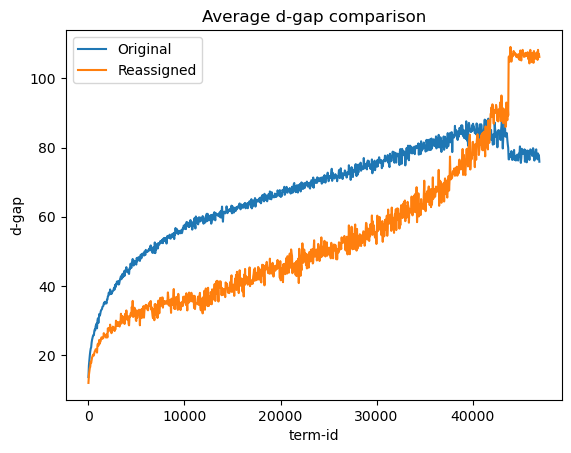

In [32]:
inference_v2.plot_avg_d_gap()

In [33]:
inference_v2.avg_compression

20.98194624191927

## 10. Summary plot

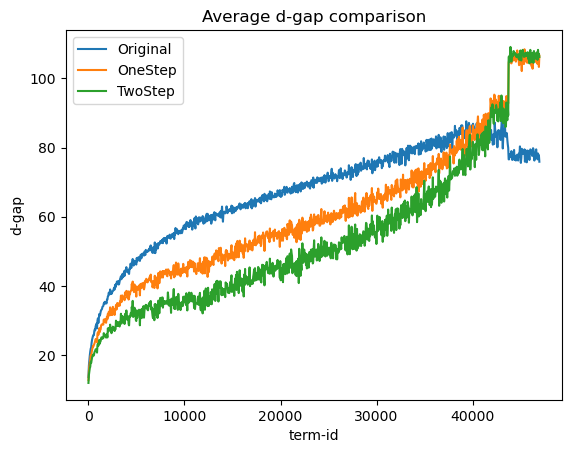

In [34]:
import numpy as np
from matplotlib import pyplot as plt

for data, label in zip(
        [d_gap_original, d_gap_reassigned, d_gap_reassigned_2],
        ["Original", "OneStep", "TwoStep"]
):
    
    data = np.array(data.avg_d_gap_pterm)

    # Define number of bins
    num_bins = 1000

    # Number of points per bin
    points_per_bin = len(data) // num_bins

    # Calculate bins average
    binned_data = data[:num_bins * points_per_bin].reshape(-1, points_per_bin)
    averages = np.mean(binned_data, axis=1)

    # X values
    x_vals = np.array(range(num_bins)) * points_per_bin

    # Plot averages
    plt.plot(x_vals, averages, label=label)

    # Title and labels
plt.xlabel('term-id')
plt.ylabel('d-gap')
plt.title(f"Average d-gap comparison")
plt.legend()

# Show
plt.show()